# Seaborn

Seaborn es una librería de muy alto nivel para gráficos, está construida sobre matplotlib y es básicamente un framework para gráficos estadísticos y de data science.

La librería es de tan alto nivel que contiene integración con Statsmodels para realizar regresiones y fiteos de gráficos según distribuciones de probabilidad.

# 1) CARGAR DATASET

In [2]:
# read a pickle file

import pandas as pd


data = pd.read_pickle('samples/01_raw_data.pickle')
sample = pd.read_pickle('samples/data_sample_1_2.pickle')


In [3]:
print("\t>>  LOADED DATASET'S  <<\n")
display(data.head(1)) 
print (">>  data |shape {}\n".format(data.shape))
print ()
display(sample.head(1))
print (">>  sample |shape {}\n".format(sample.shape))

	>>  LOADED DATASET'S  <<



,TFS-EE-226-BU-1_SUC-P.PV,TFS-EE-226-BU-2_SUC-P.PV,TFS-EE-226-BU-1_DISCH-P.PV,TFS-EE-226-BU-2_DISCH-P.PV,TFS-EE-176-MB_FC-HDR-DEN-OBS.PV,TFS-EE-176-MB_FC2-HDR-T.PV,TFS-EE-176-MB_FC2-HDR-GSF.PV,TFS-EE-176-MTR_OUT-P.PV,MLN-EE-76-U-1_SUC-P.PV,MLN-EE-76-U-2_SUC-P.PV,...,MLN-EE-76-U-2_CAS-P.PV,MLN-EE-76_DISCH-P.SP,MLN-EE-76_DISCH-P-CTRL.PV,MLN-EE-76_T.PV,MLN-EE-76_FLW.PV,TFS-EE-176-MB_FC-HDR-DEN-COR.PV,TFS-EE-176-MB_FC-HDR-T.PV,MLN-IZ-76_HLD-P.SP,MLN-IZ-76_HLD-P-CTRL.PV,MLN-EE-76-PCV_POS.PV
Time,,,,,,,,,,,,,,,,,,,,,
2022-08-30,58.434475,58.435314,59.228432,662.705933,689.0,11.750285,103,639.035278,-6.174922,620.357971,...,7105.064941,3000,2995.553223,16.764715,103.566818,686.514221,11.778991,1250,1251.718628,28.638605


>>  data |shape (1801, 21)




,sample_1,sample_2
Time,,
2022-08-30,-6.174922,689.0


>>  sample |shape (1801, 2)



In [4]:
#TODO: Chequear que compartir en formato pickle es más liviano y conserva más información que en csv
from python_package.data_prepare import data_info
display(data_info(data.reset_index()).head(10))
print ('...')
print ('Chequear que compartir archivos en formato pickle es más liviano y conserva más información que en csv')#\n

info de data,index,columna,Nan,pct_nan,dtype,count,pct_reg,count_unique
0,0,Time,0,0.0,datetime64[ns],1801,100.0,1801
1,7,TFS-EE-176-MB_FC2-HDR-GSF.PV,0,0.0,int64,1801,100.0,1
2,13,MLN-EE-76_DISCH-P.SP,0,0.0,int64,1801,100.0,1
3,19,MLN-IZ-76_HLD-P.SP,0,0.0,int64,1801,100.0,1
4,5,TFS-EE-176-MB_FC-HDR-DEN-OBS.PV,0,0.0,float64,1801,100.0,768
5,17,TFS-EE-176-MB_FC-HDR-DEN-COR.PV,0,0.0,float64,1801,100.0,1591
6,21,MLN-EE-76-PCV_POS.PV,0,0.0,float64,1801,100.0,1729
7,14,MLN-EE-76_DISCH-P-CTRL.PV,0,0.0,float64,1801,100.0,1740
8,4,TFS-EE-226-BU-2_DISCH-P.PV,0,0.0,float64,1801,100.0,1750
9,8,TFS-EE-176-MTR_OUT-P.PV,0,0.0,float64,1801,100.0,1765


...
Chequear que compartir archivos en formato pickle es más liviano y conserva más información que en csv


# 2) MAPAS DE CORRELACION

In [9]:
data.corr().fillna(0).style.background_gradient(cmap='coolwarm');

<Axes: >

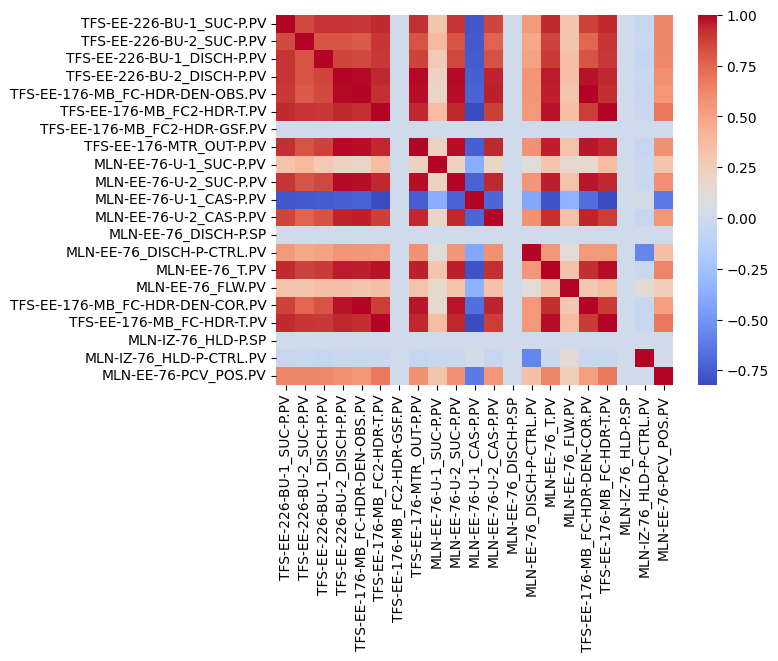

In [6]:
import seaborn as sns

sns.heatmap(data.corr().fillna(0), cmap='coolwarm')

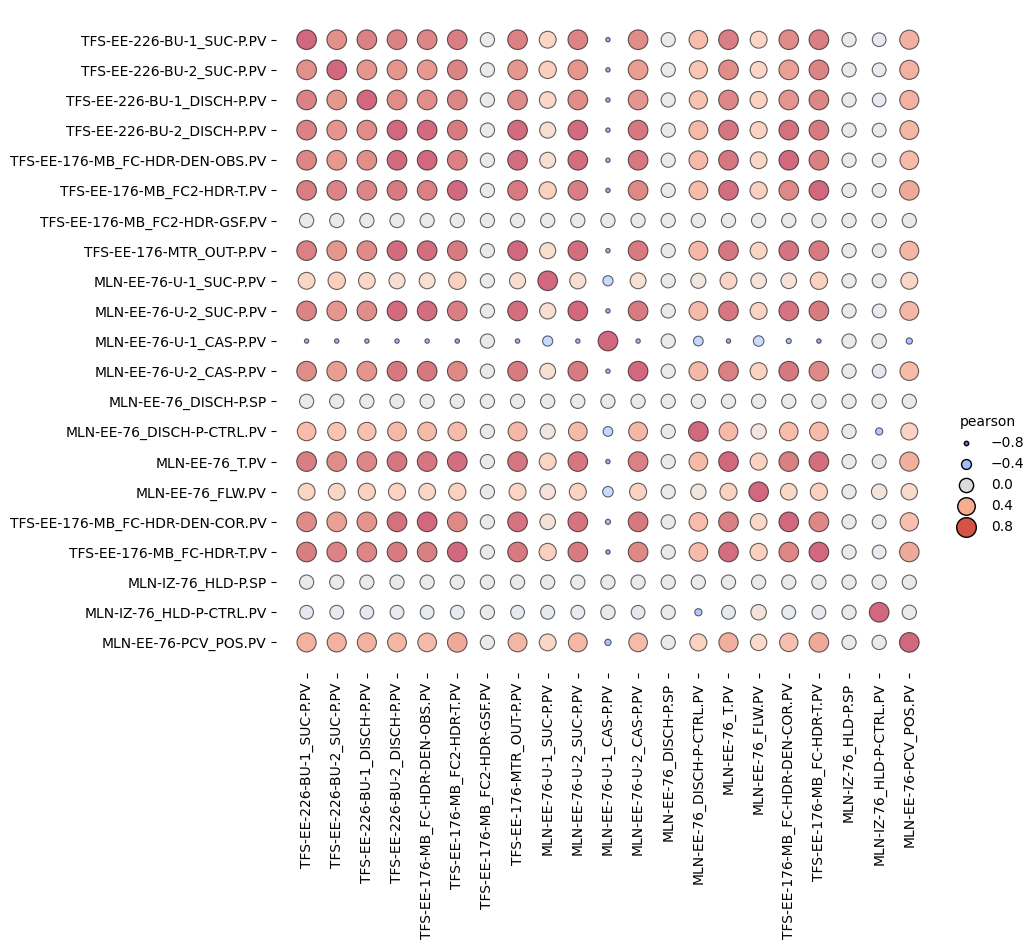

In [7]:
df = data.corr().fillna(0)
corr_mat = df.stack().reset_index(name='pearson')
corr_mat;

g = sns.relplot(data=corr_mat, x='level_0', y='level_1', hue='pearson', size='pearson', sizes=(10, 200), alpha=0.6, palette='coolwarm', height=10, edgecolor='black', hue_norm=(-1, 1), size_norm=(-0.7, 0.7))
g.set(xlabel='', ylabel='', aspect='equal')
g.despine(left=True, bottom=True)
g.ax.margins(0.05)

for label in g.ax.get_xticklabels():
    label.set_rotation(90)

for artist in g.legend.legend_handles:
    artist.set_edgecolor('black')

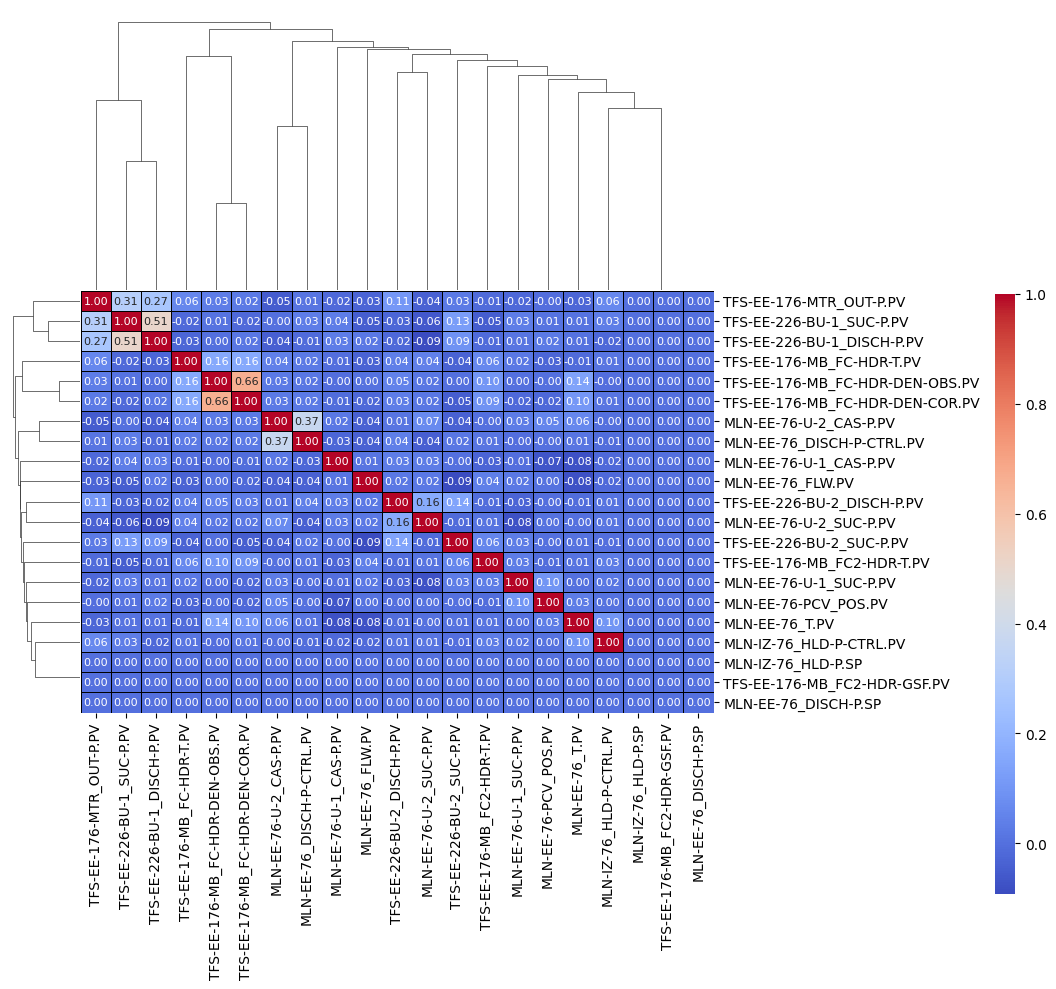

In [8]:
df = data.pct_change().dropna()
sns.clustermap(df.corr().fillna(0), cmap='coolwarm', figsize=(10, 10), dendrogram_ratio=(0.1, 0.4),
cbar_pos=(1, 0.1, 0.02, 0.6), linewidths=0.5, linecolor='black', annot=True, annot_kws={'size': 8}, fmt='.2f');